# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
warnings.filterwarnings('ignore')
sns.set_theme()

In [2]:
#fetching the dataset
df = pd.read_csv('Wholesale_Data.csv')

## Examining our dataset - Features and Rows

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Checking Null Values

In [4]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

### Data Types

In [5]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

### Descriptive Statistics

In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
# Dividing the features into Categorical and Numerical Data for analysis
cat_cols = df[['Channel','Region']].columns
num_cols = df.drop(cat_cols,axis=1).columns

## EDA 

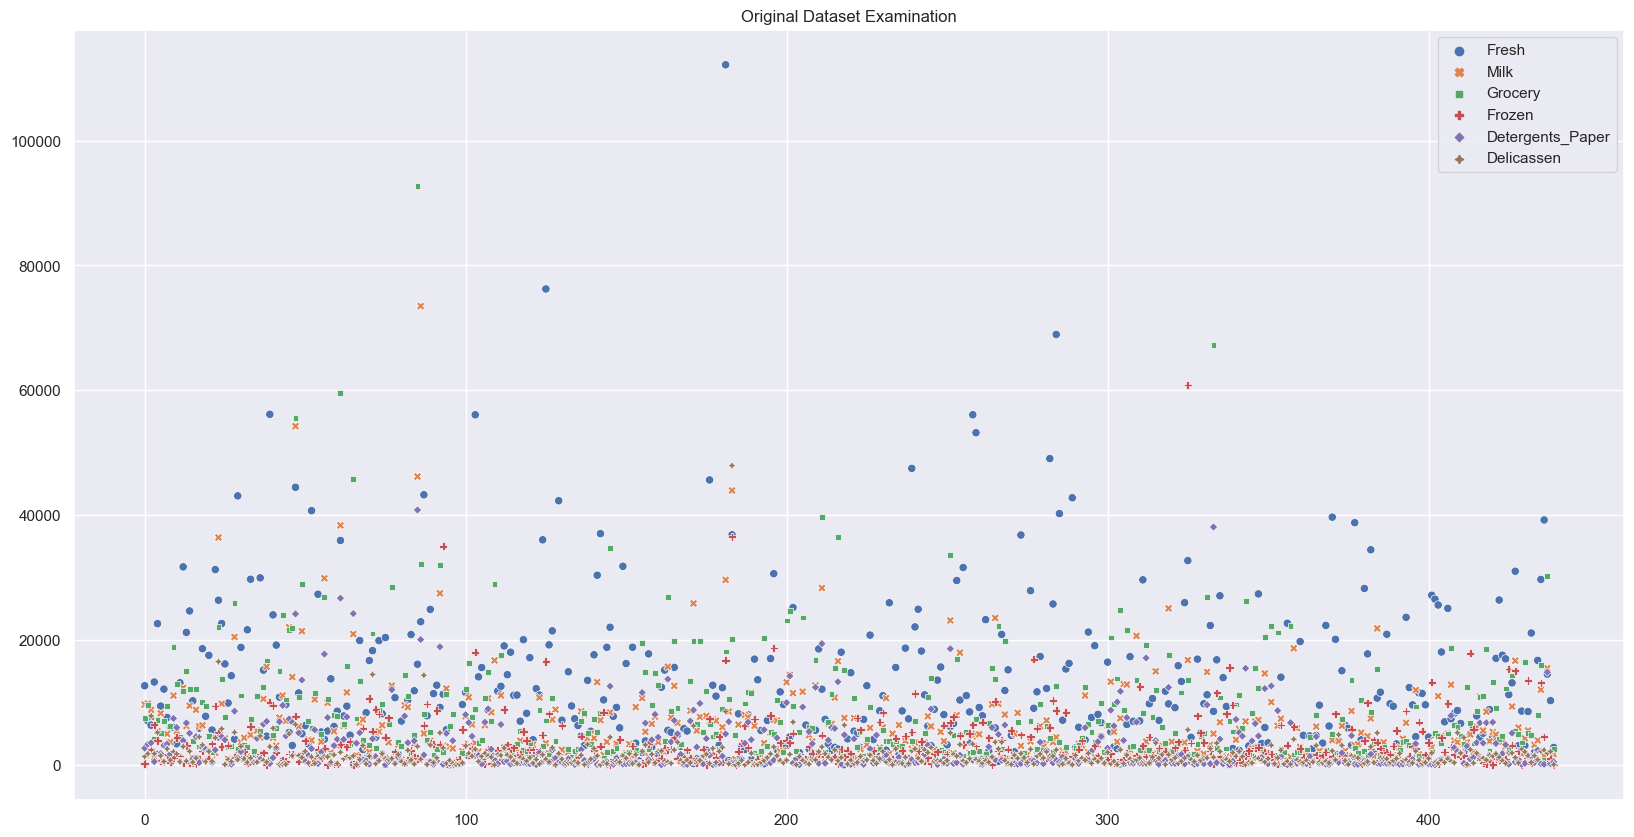

In [8]:
#Plotting our original dataset

plt.figure(figsize=(20,10))
sns.scatterplot(data=df[num_cols])
plt.title("Original Dataset Examination")
plt.show()

### Plotting inital Histogram for each feature

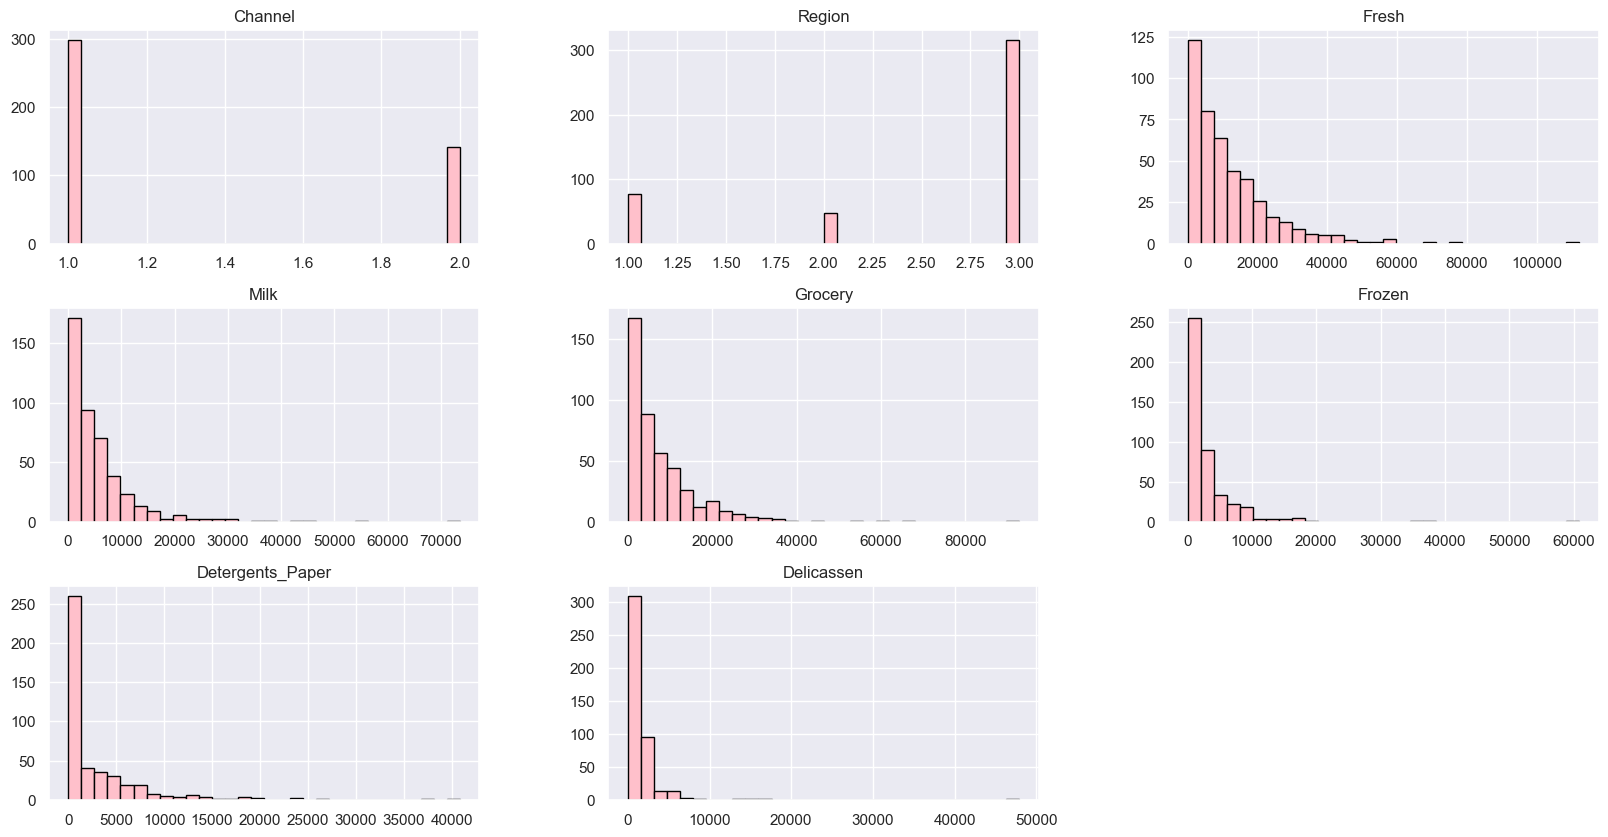

In [9]:
df.hist(figsize=(20,10),bins=30,color='pink',edgecolor='black')
plt.title("Intial Feature Analysis")
plt.show()

Comments
- The data in each feature is right skewed pointing towards outlier presence. 

### Categorical Columns - Region and Channel

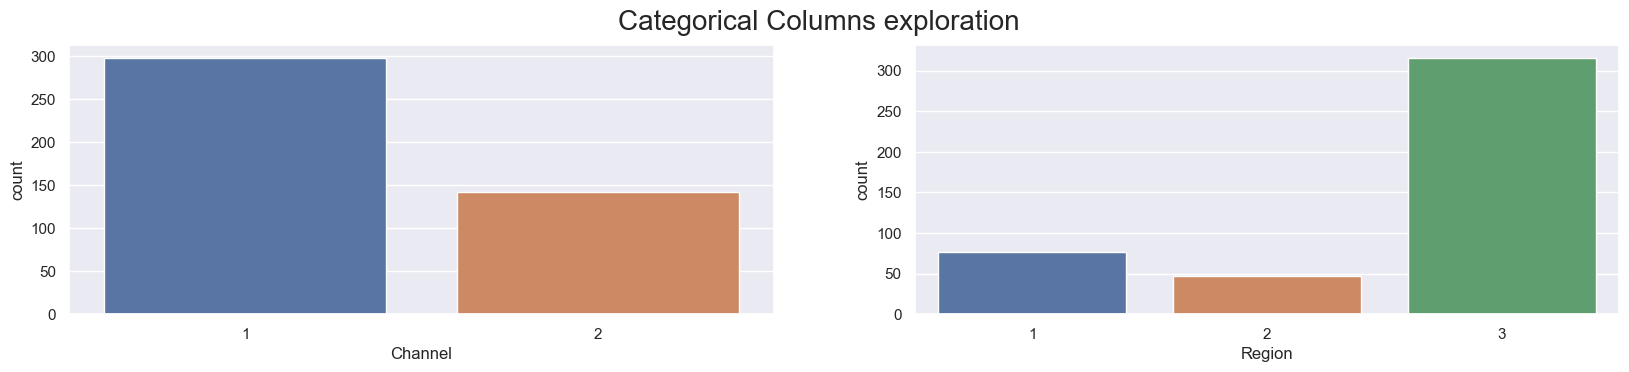

In [10]:
fig, axes = plt.subplots(1, 2,figsize=(20,3.5))

for i,col in enumerate(df[cat_cols].columns):
    sns.countplot(x=df[col],ax=axes[i])
    plt.xlabel(col)

plt.suptitle("Categorical Columns exploration",fontsize='20')   
plt.show()

- Shows how the data is divided among 2 different channels and 3 different regions

### Numerical Columns - Histogram and Box plot

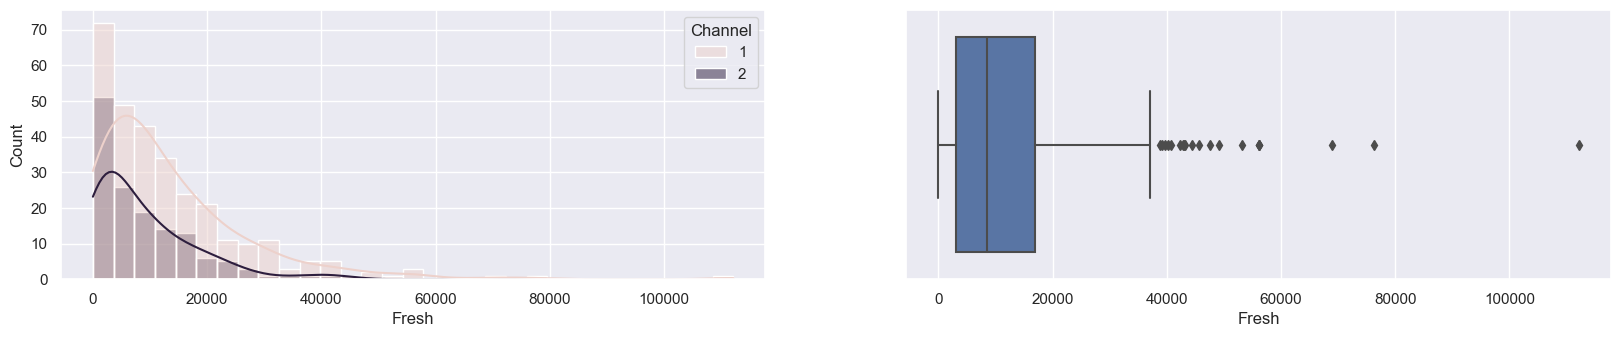

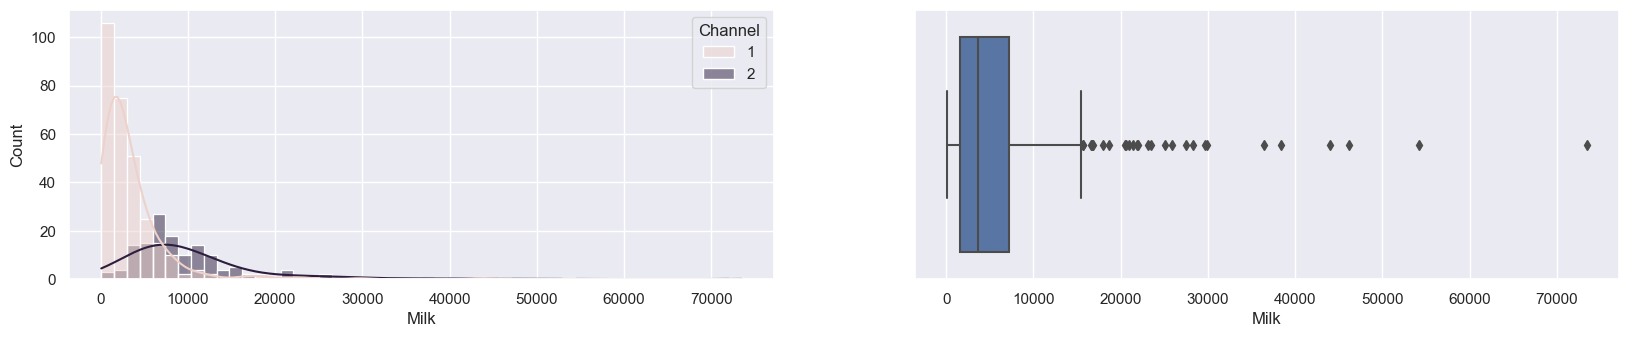

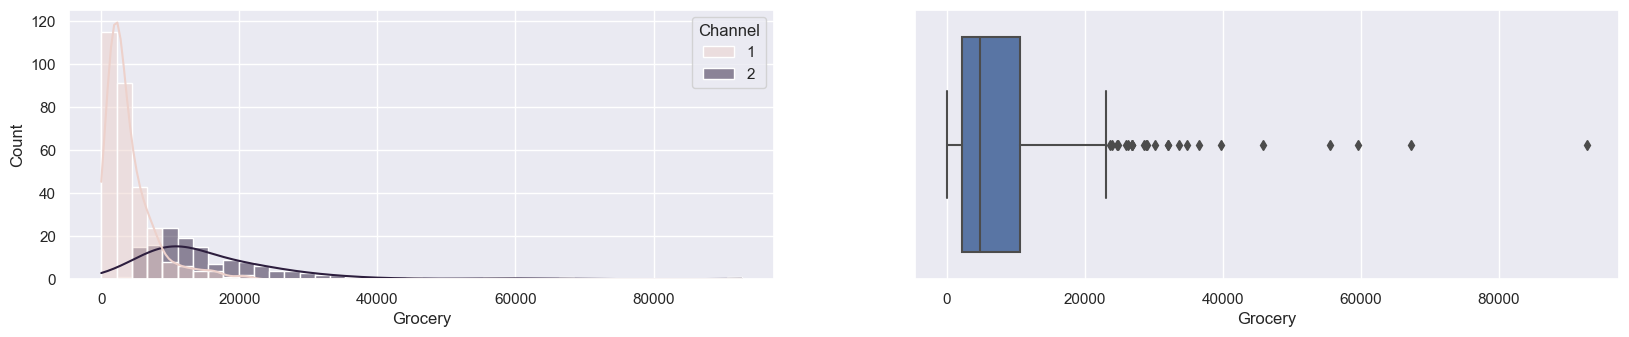

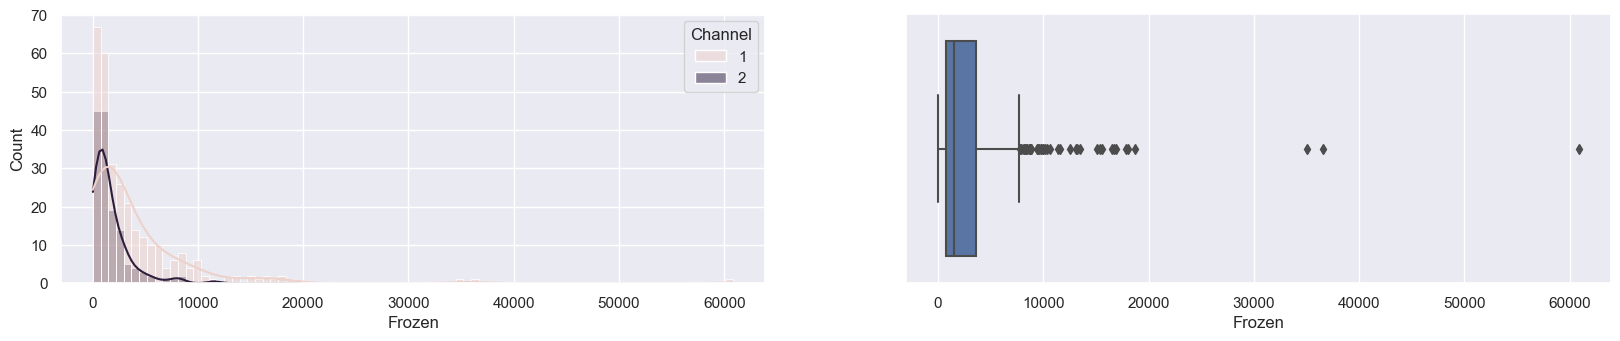

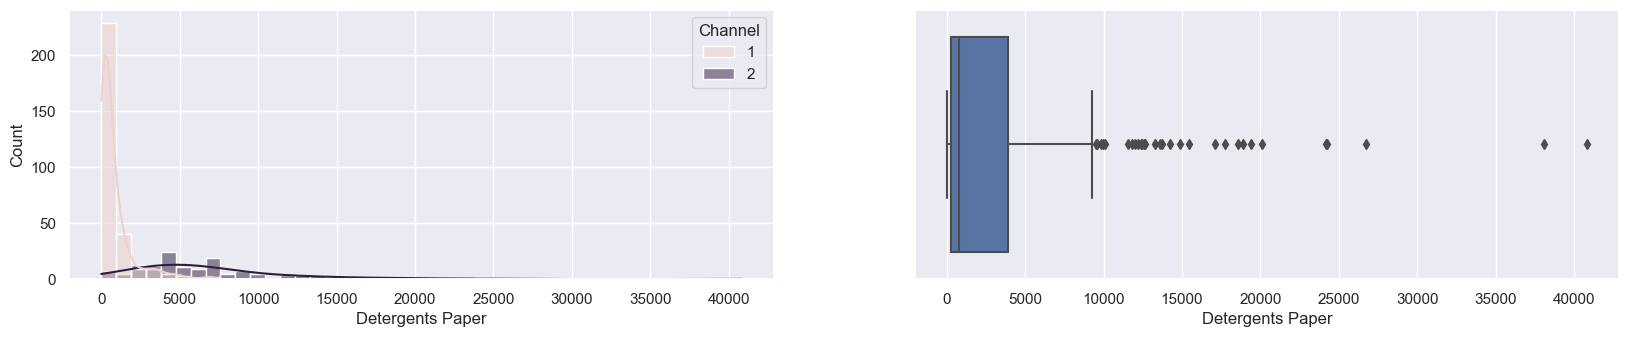

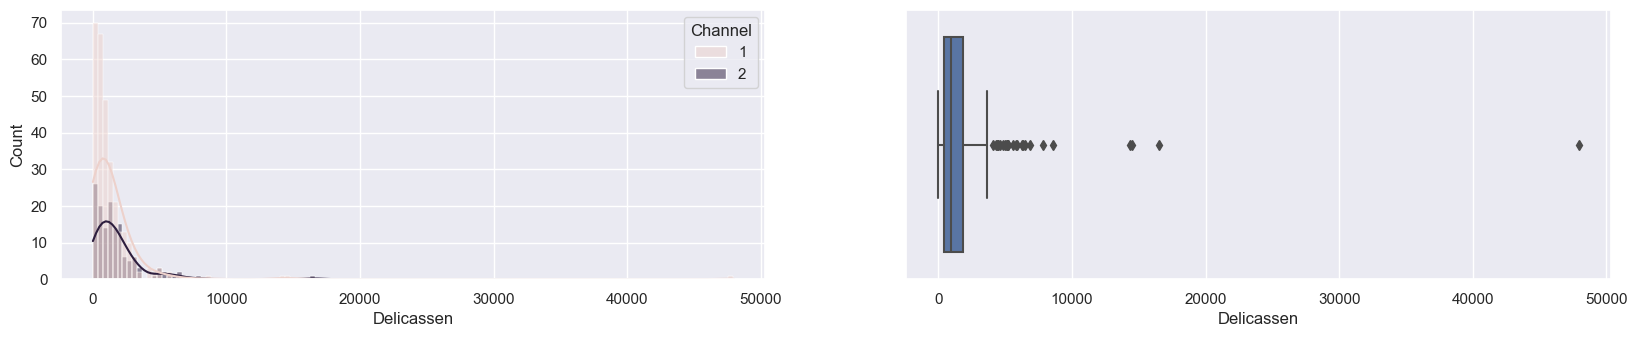

In [11]:
for col in df[num_cols].columns:

    fig, axes = plt.subplots(1, 2,figsize=(20,3.5))

    #plotting a histogram for col
    sns.histplot(x=df[col],ax=axes[0],hue=df['Channel'],kde=True)
    axes[0].set_xlabel(col.replace('_',' '))
    

    #plotting box plot for same col
    sns.boxplot(x=df[col],ax=axes[1])
    axes[1].set_xlabel(col.replace('_',' '))

plt.show()

- Outliers present in each feature making it right skewed and will impact our cluster creation as well.

## Data Cleaning - Outlier removal

In [12]:
#Outlier Removal 

def removing_outliers(data):
    for column in data.columns:
        if data[column].dtype in ['int64', 'float64']:  # Check if column is numeric
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            IQR = q3 - q1
            lower_thresh = q1 - (1.5 * IQR)
            upper_thresh = q3 + (1.5 * IQR)
            data = data[(data[column] >= lower_thresh) & (data[column] <= upper_thresh)]
    return data

cleaned_data = removing_outliers(df.select_dtypes(include=np.number)[num_cols])

# Update DataFrame
df = df.loc[cleaned_data.index]

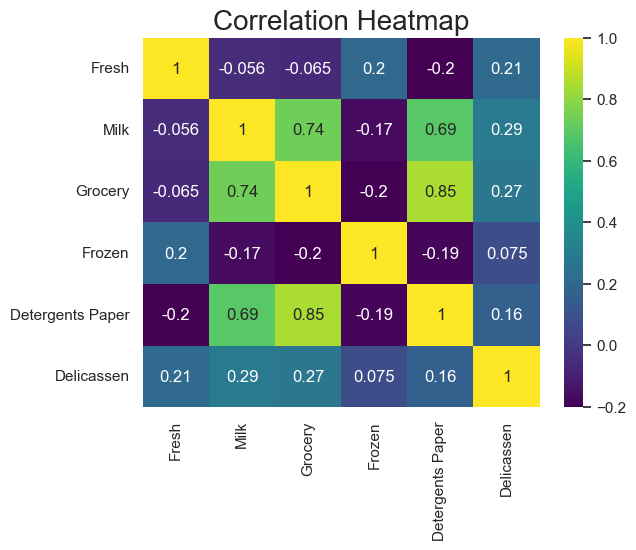

In [13]:
#human readable ticks for heatmap
names = df[num_cols].columns.to_list()
for i in range(len(names)):
    names[i] = names[i].replace('_',' ').title()

corr = df[num_cols].corr()

sns.heatmap(corr,annot=True,xticklabels=names,yticklabels=names,cmap='viridis')
plt.title("Correlation Heatmap",fontsize='20')
plt.show()

### Pairplotting

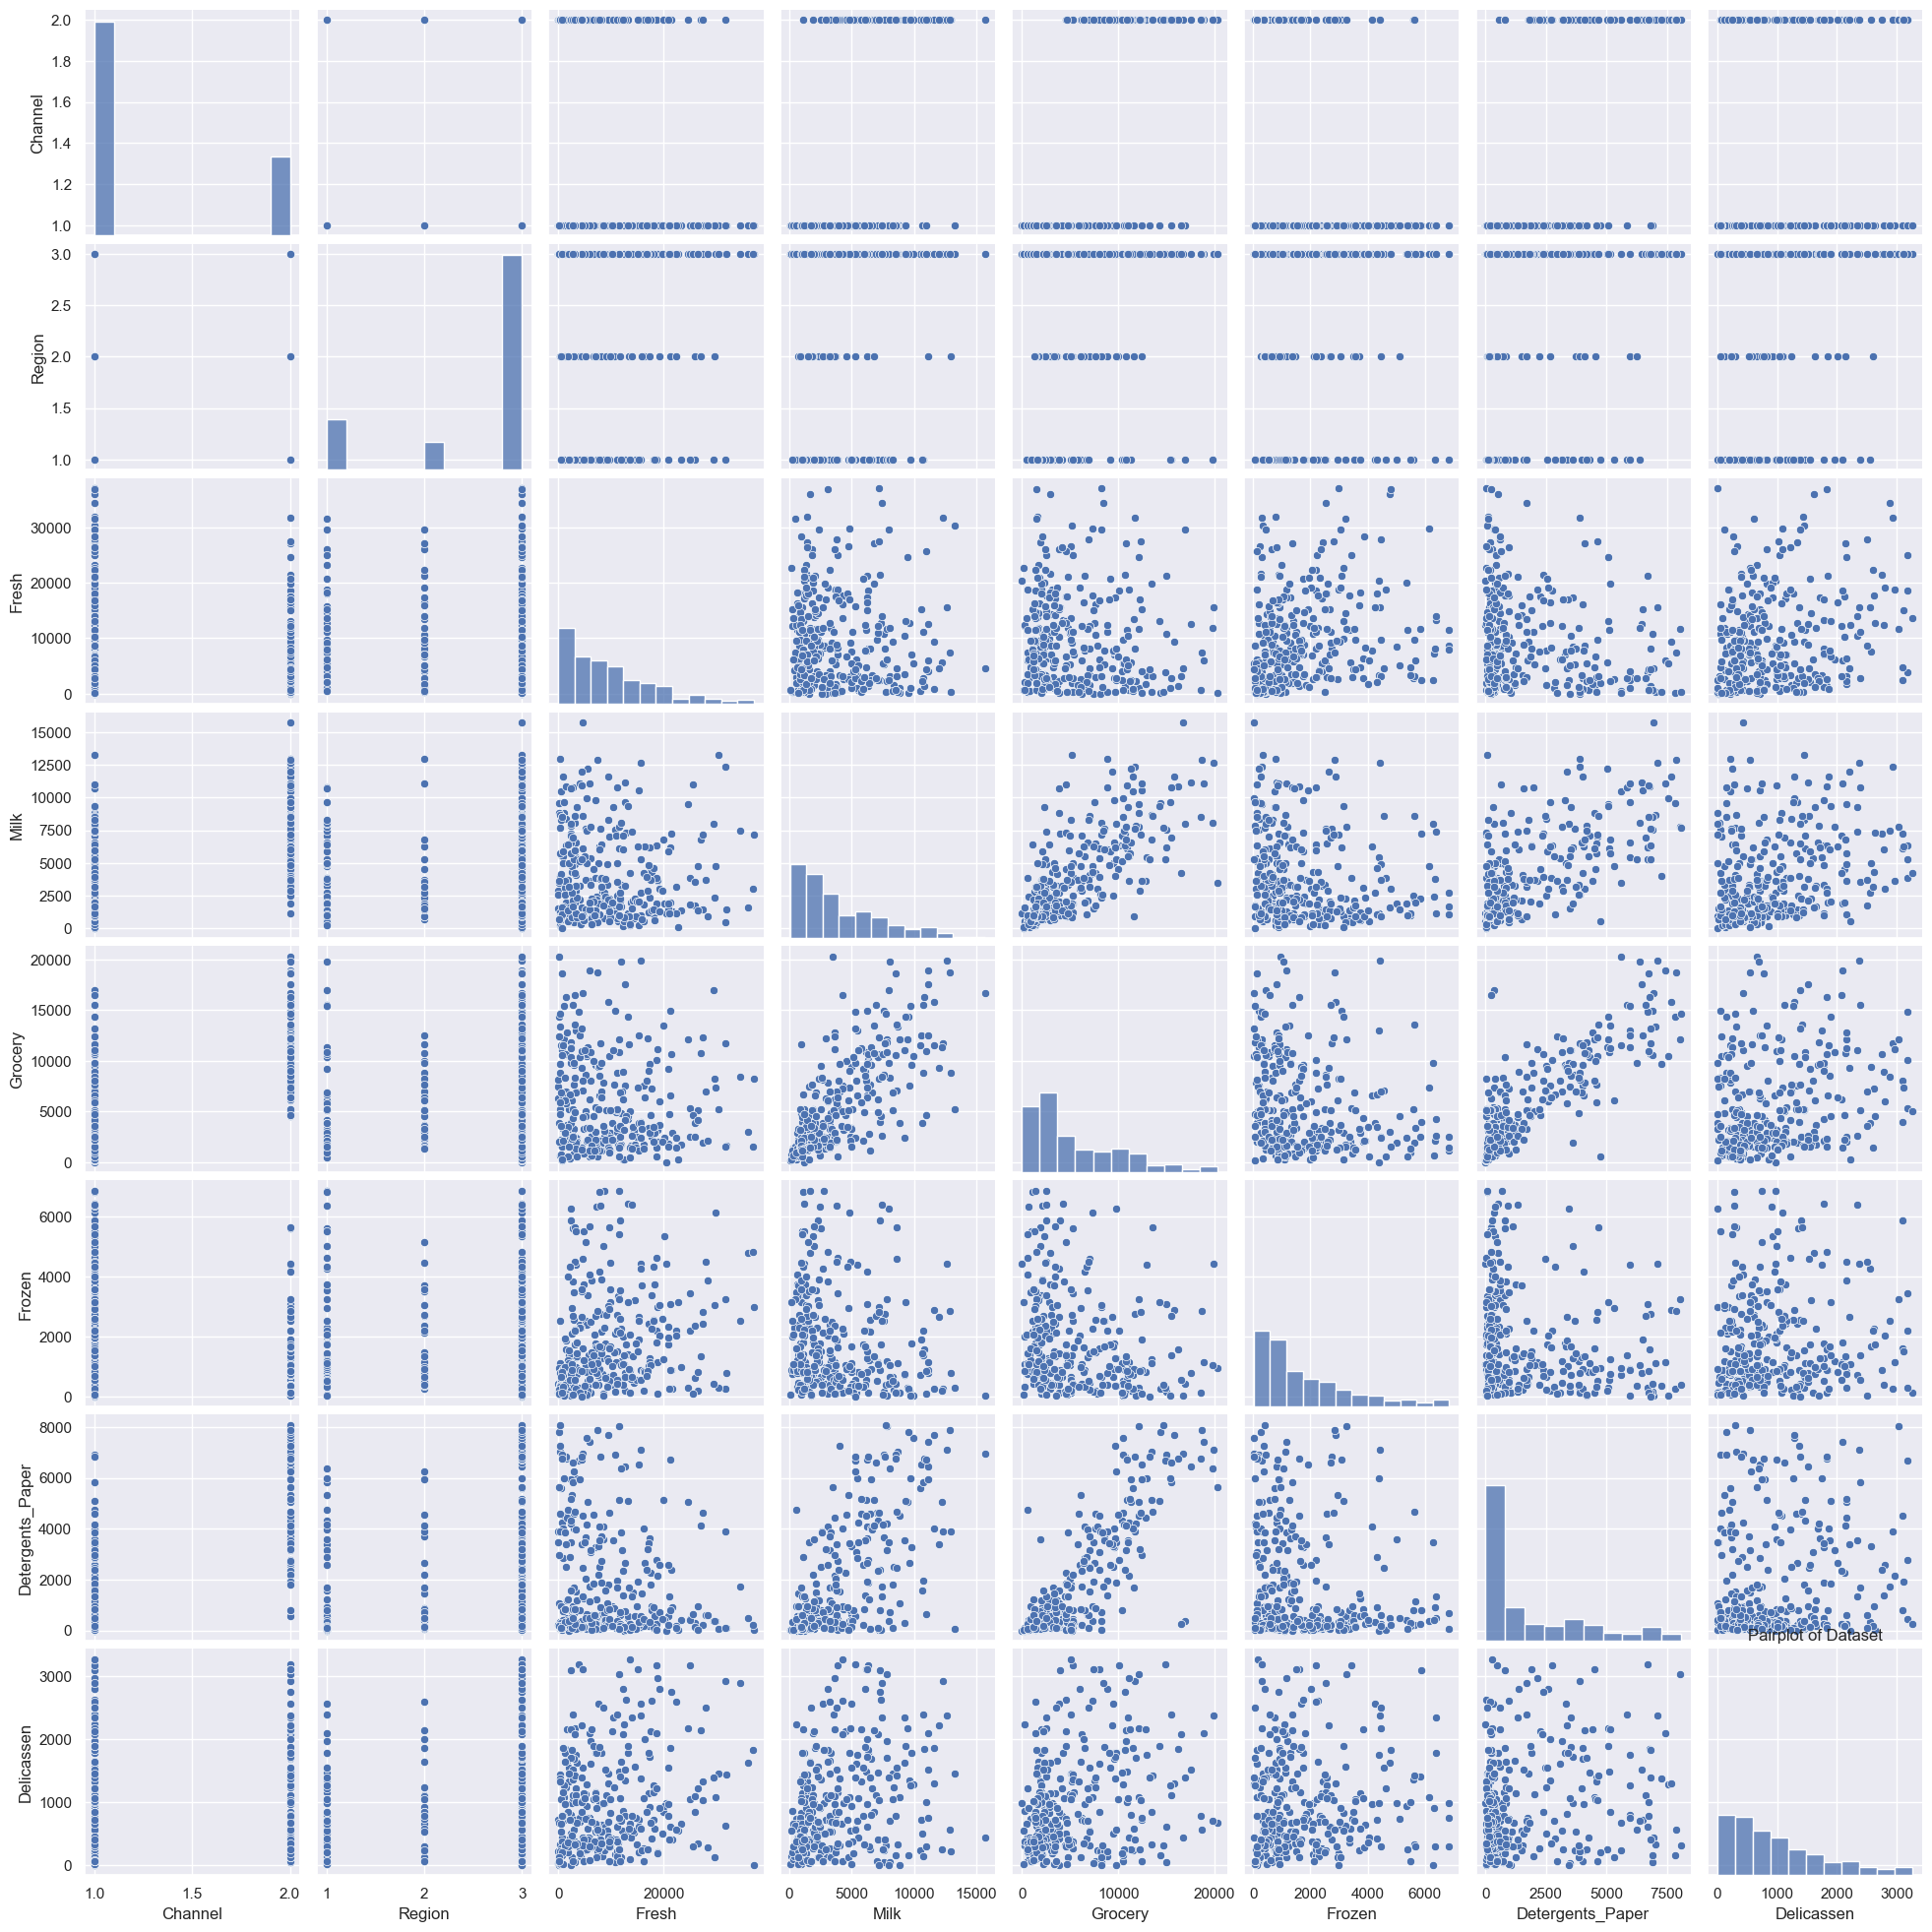

In [14]:
sns.pairplot(data=df)
plt.title("Pairplot of Dataset")
plt.show()

## Preprocessing - Scaling the data

In [14]:
#selecting numerical columns
X = df[num_cols]

#creating an instance of MinMaxScalar, fitting and transforming data
minmax = MinMaxScaler()
X_scaled = minmax.fit_transform(X)

In [15]:
#converting to dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#### Examining scaled data

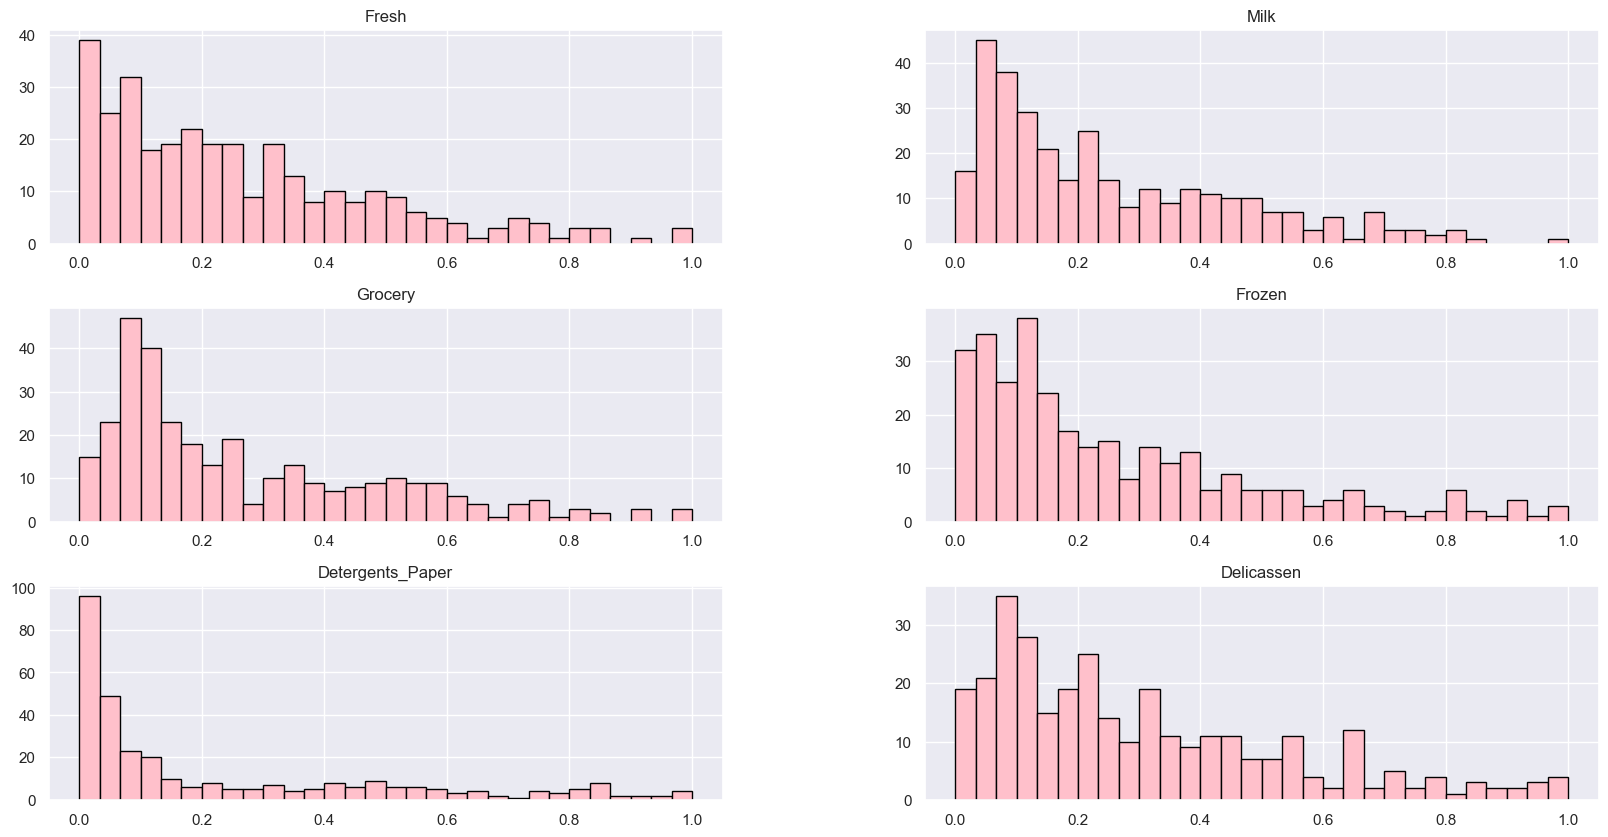

In [16]:
X_scaled.hist(figsize=(20,10),bins=30,color='pink',edgecolor='black')
plt.show()

The skeweness of each features has been diminished after the outlier removal and each feature ranges from 0 to 1 in values of each row providing a base scaling for our model fitting.

In [17]:
#each feature ranges from 0 to 1
X_scaled.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,0.262338,0.251000,0.274074,0.260213,0.227595,0.300242
std,0.221427,0.208026,0.227861,0.236461,0.273298,0.240338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.082116,0.081313,0.098502,0.080682,0.027960,0.109318
50%,0.210582,0.190762,0.187910,0.171481,0.083230,0.227356
75%,0.380249,0.391285,0.415619,0.371628,0.405004,0.440177
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Part II - KMeans Clustering

In [18]:
from sklearn.cluster import KMeans
import numpy as np

In [19]:
#elbow method for determining the number of clusters for K-means
def plot_distortion(X , max_clusters=10):
    distortions = []

    for i in range(1,max_clusters+1):
        km = KMeans(n_clusters = i,
            init = 'k-means++',
            n_init = 10,
            random_state = 0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

In [20]:
#For plotting the clusters with centroids

def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    plt.figure(figsize=(15,7))
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        
        plt.scatter(x,
                    y,
                    s=20,
                    marker='o',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=200,
                    label='centroids')
    plt.legend()
    plt.show()

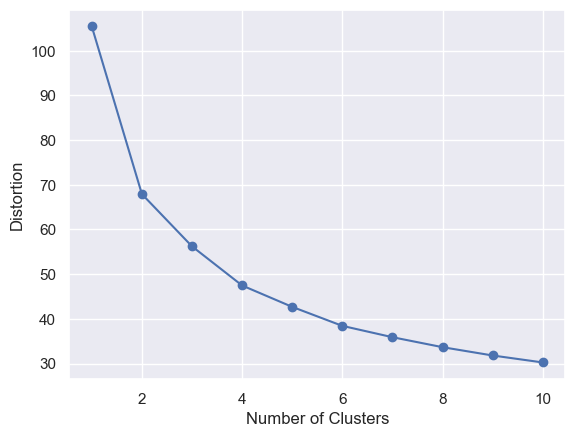

In [21]:
#plotting Distortion vs Number of Clusters to determine optimal number of clusters
plot_distortion(X_scaled,max_clusters=10)

From above graph, `Clusters = 3` is where our elbow can be recognized and the line seems becoming parallel to X-axis at a faster rate. We will use  `Clusters = 3` in the next segment for K-means clustering to form dataset clusters

In [22]:
#creating an instance, fitting and prediciting clusters

km = KMeans(n_clusters=3,
            n_init=10,
            random_state=0)

#fitting the model
y_km = km.fit_predict(X_scaled.values)

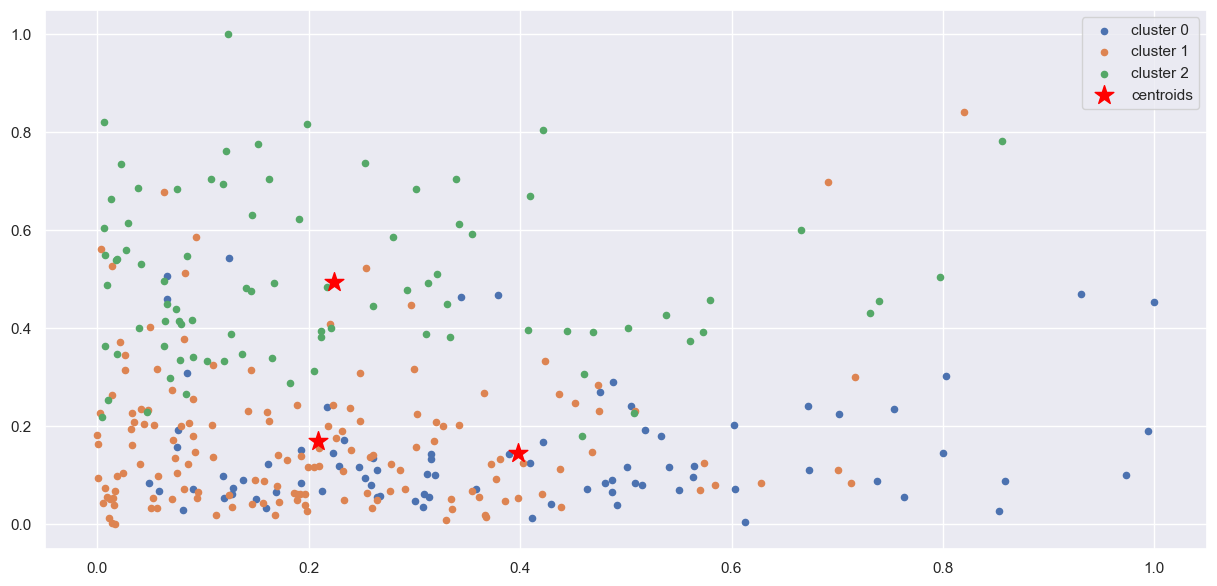

In [23]:
# plot clustering result
plot_clusters(X_scaled.values, y_km, plt_cluster_centers= True)

# Part III - Hierarchical Clustering 

In [24]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [25]:
def plot_dendrogram(X,method ='ward'):
    plt.figure(figsize=(20,10))
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

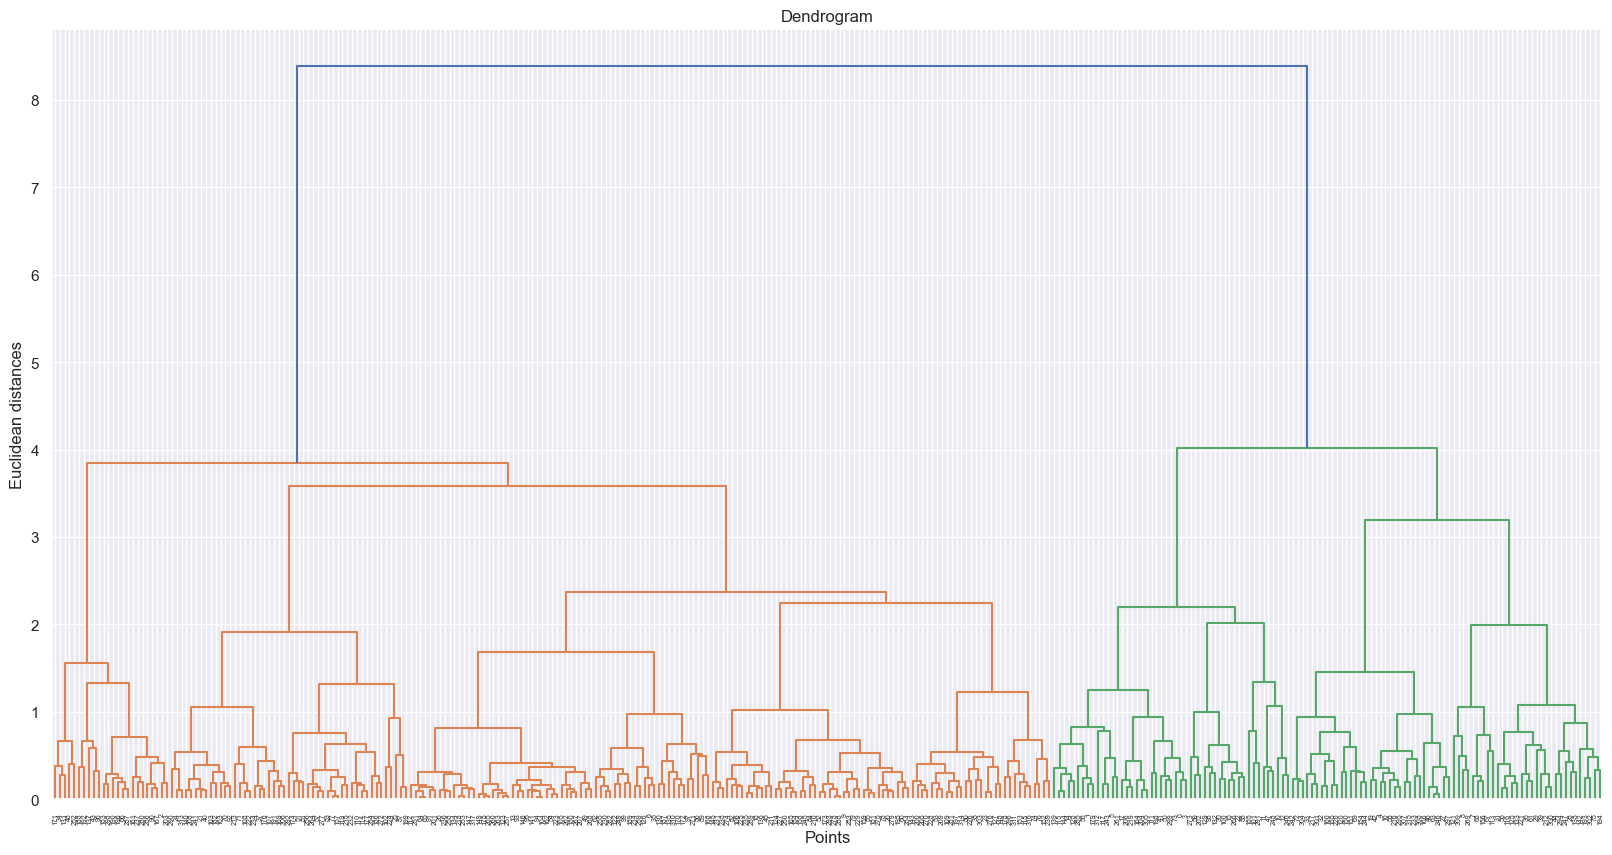

In [26]:
#plotting Dendograms to determine optimal number of clusters
plot_dendrogram(X_scaled.values)

From the above dendogram, it is determined that dataset can be divided into 3 clusters ( represented nby 3 different colors as well). We will use this information for hierarchical clustering in the following cell.

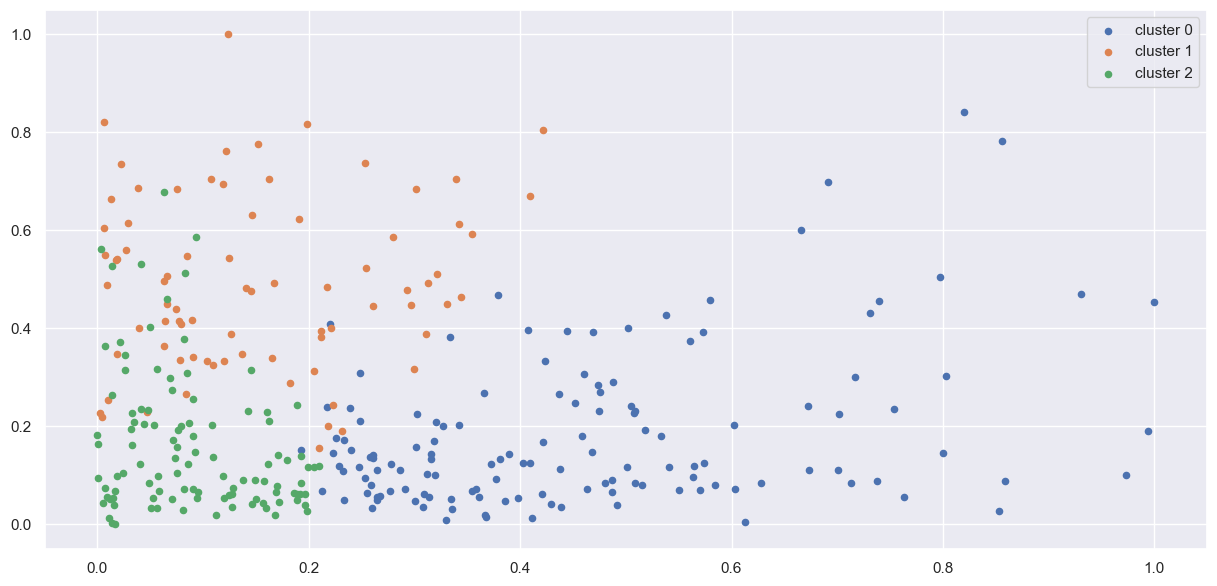

In [27]:
#creating an instance
ac = AgglomerativeClustering(
    metric='euclidean',
    linkage='ward',
    n_clusters=3
)

y_hc = ac.fit_predict(X)
plot_clusters(X_scaled.values,y_hc)

Hierarachial Clustering is better at determining the clusters as compared to K-means clustering as the clusters are more visible and points are more near to each other

# Part IV - PCA

In [28]:
from sklearn.decomposition import PCA

#creating an instance
pca = PCA()

In [29]:
#checking the shape before PCA
X_scaled.shape

(318, 6)

In [30]:
X_pca = pca.fit_transform(X_scaled)

#examining the feature after PCA
X_pca 

array([[ 0.33709361,  0.02580329, -0.21899175,  0.07443204,  0.22497755,
        -0.06910272],
       [ 0.44699392,  0.14148929, -0.0217609 , -0.12457312,  0.19275376,
        -0.01249769],
       [-0.3028483 ,  0.54615209,  0.38965197, -0.18618931, -0.0811061 ,
         0.07621727],
       ...,
       [ 0.10695768, -0.00440617, -0.13893754,  0.21595265, -0.06486209,
         0.03881225],
       [-0.19099351,  0.17606027, -0.30809913, -0.23591098, -0.04720793,
        -0.02414019],
       [-0.25071127, -0.42347969, -0.10501569,  0.00204542,  0.00806757,
         0.01855794]])

In [31]:
#checking variance of each component after PCA
pca.explained_variance_ratio_

array([0.46198891, 0.21809786, 0.13847481, 0.10970811, 0.04764217,
       0.02408813])

#### Plotting PCA analysis

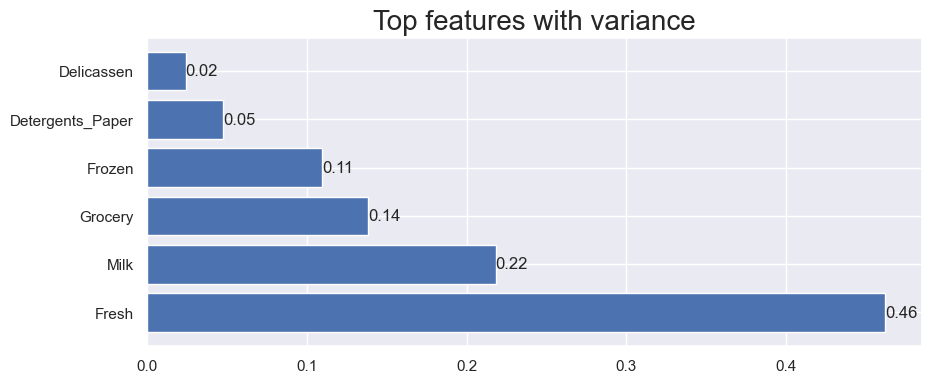

In [32]:
plt.figure(figsize=(10,4))
bars = plt.barh(width=pca.explained_variance_ratio_,y=X_scaled.columns)

# Annotate each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', ha='left', va='center')

plt.title("Top features with variance",fontsize='20')
plt.grid(True)
plt.show()

82% variance can be explained by Features `Fresh(0.46) , Milk (0.22) and Grocery (0.14)` in this dataset after PCA analysis.

### Plotting the variance ratio of each feature 

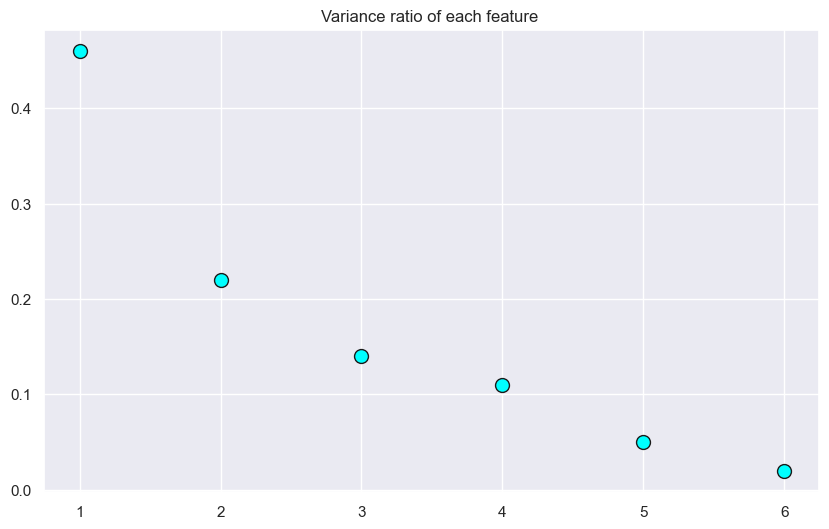

In [33]:
variance_ratio = []
number_of_features = []

for i in range(len(pca.explained_variance_ratio_)):
    number_of_features.append(i+1)
    variance_ratio.append(round(pca.explained_variance_ratio_[i],2))

plt.figure(figsize=(10,6))

plt.scatter(x=number_of_features,y=variance_ratio,s=100,color='cyan',edgecolor='k')
#plt.yticks(variance_ratio)
#plt.legend(variance_ratio)
plt.title("Variance ratio of each feature ")
plt.grid(True)
plt.show()

### Fitting Hierarichal CLustering on scaled PCA data

In [34]:
#creating an instance
pca_scaled = PCA(n_components=2)

X_PCA_scaled = pca_scaled.fit_transform(X_scaled)

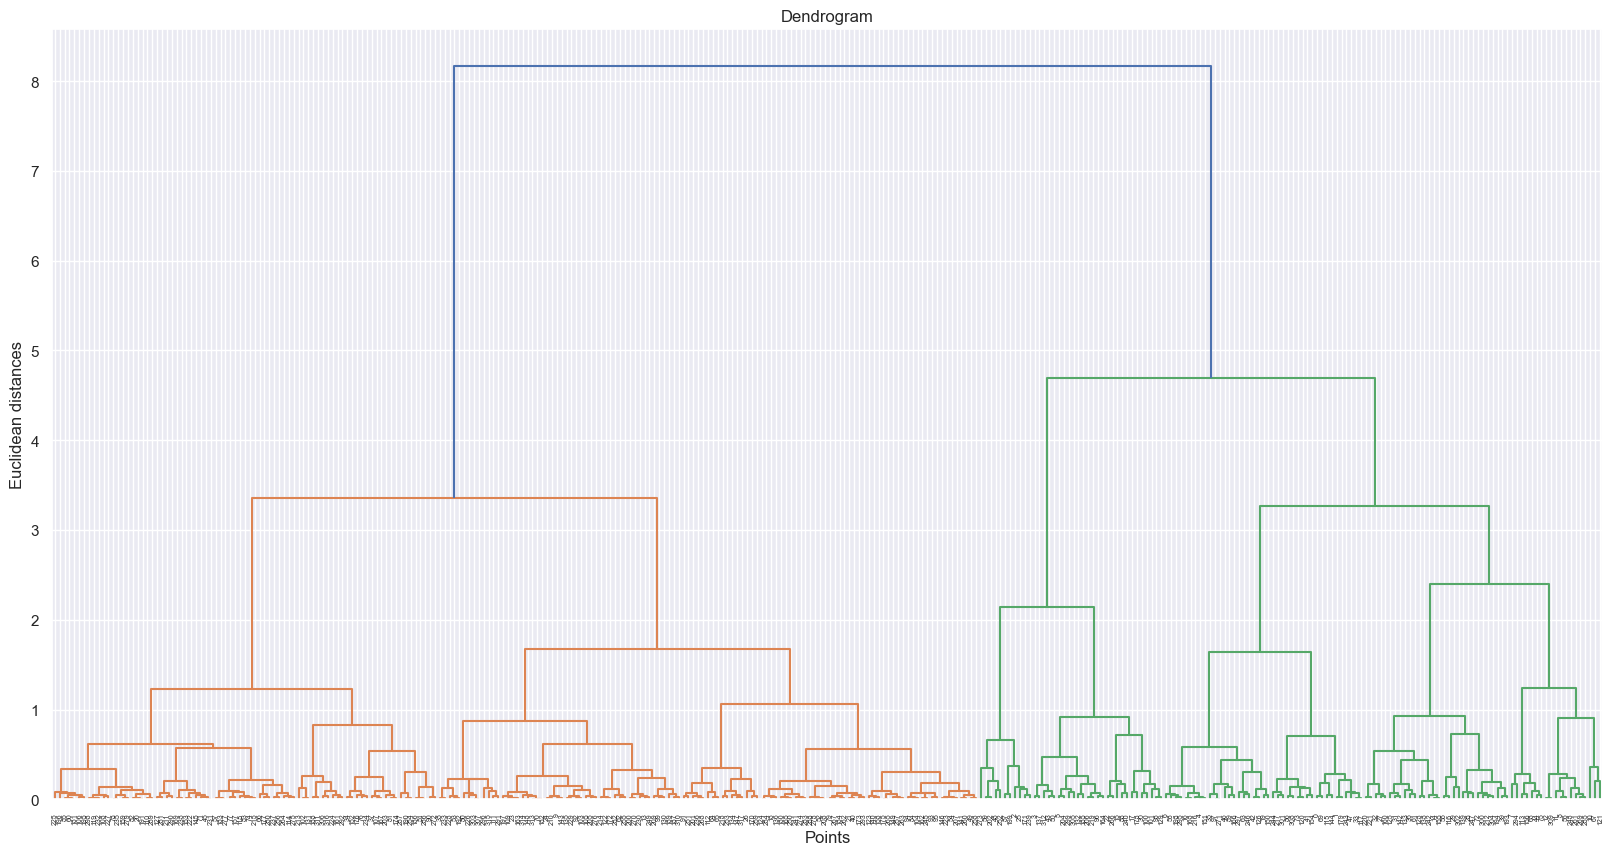

In [35]:
#plotting Dendograms to determine optimal number of clusters
plot_dendrogram(X_PCA_scaled)

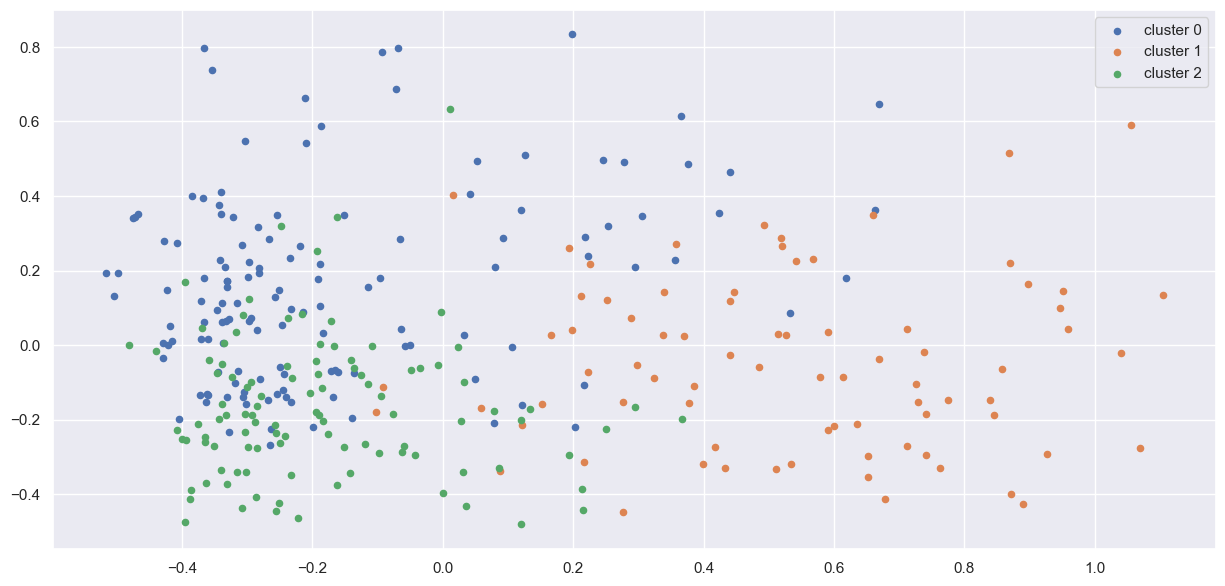

In [36]:
#creating an instance
ac_2 = AgglomerativeClustering(
    metric='euclidean',
    linkage='ward',
    n_clusters=3
)

y_hc_pca = ac_2.fit_predict(X)
plot_clusters(X_PCA_scaled,y_hc_pca)

# Part V - Conclusion

***Based on the Exploratory Data Analysis (EDA) and the models developed, here are the key findings:***

**1. Hierarchical Clustering Performance:**
    Hierarchical clustering explains the dataset better and provides more meaningful clustering results compared to K-means clustering. This is likely due to the ability of hierarchical clustering to capture nested clusters and its flexibility in choosing the number of clusters through dendrogram analysis.

**2.  Top Three Features:**
    The top three features that explain the variance in this dataset are:
    - Milk
    - Grocery
    - Fresh
    These features contribute significantly to the variance observed in the data, making them crucial for clustering.

**3. Feature Correlation:**
    - Milk and Grocery: These two features have a high correlation of 0.69. This suggests that customers who purchase milk are also likely to purchase groceries and vice versa.
    - Grocery and Detergents_Paper: These features also exhibit a high correlation of 0.74. This indicates that customers buying groceries are also likely to buy detergents and paper products.

**4.  Conclusion on Clustering:**
    Hierarchical clustering is better at explaining the relationships between data points. It provides more insight into how different features and clusters are related, offering a more nuanced understanding of customer purchasing behavior compared to K-means clustering.